In [63]:
# This is only valid when the package is not installed
import sys
sys.path.append('../../') # two folders up

import DeepINN as dp
from DeepINN.geometry.domains.domain2D.shapely_polygon import ShapelyPolygon # polygon creator
from DeepINN.geometry.domains.domain3D.trimesh_polyhedron import TrimeshPolyhedron
import torch

In [21]:
X = dp.spaces.R3('x')
P = TrimeshPolyhedron(X, file_name='/home/hell/Desktop/PhD/PhD work/PINNs/10. June 2022/4. Week 4/SUT/3. Nvidia Modulus/7. Modified Fourier + importance sampling + adaptive activation/stl_files/stl_file.stl', file_type='stl')

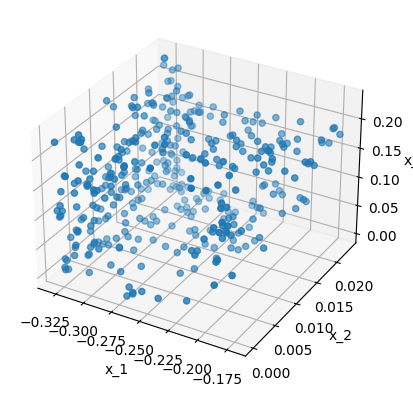

In [14]:
P_sampler = dp.samplers.LHSSampler(P, n_points=200) + dp.samplers.RandomUniformSampler(P.boundary, n_points=200)

dp.utils.scatter(X, P_sampler)

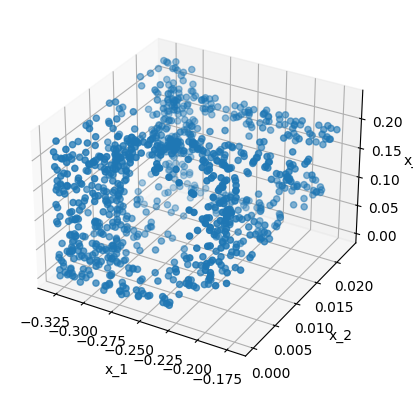

In [73]:
P_sampler = dp.samplers.RandomUniformSampler(P.boundary, n_points=1000, filter_fn=lambda x: abs(x[:,0]-0.2)<=0.9)

dp.utils.scatter(X, P_sampler)

In [ ]:
#import mat

The last point of this tutorial is the possibility to transform a *TrimeshPolyhedron* to a *ShapelyPolygon*, by either projecting or slicing with a plane. This is also a functionality implemented in Trimesh. 

This may be useful, if the problem should first be researched in 2D, which most of the time is less expensive. For this, only have to choose how we want to create the 2D-representation. Here we use slicing, the projection works the same:

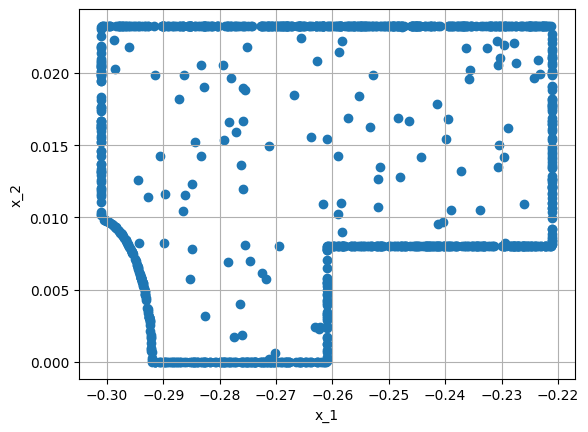

In [54]:
new_space = dp.spaces.R2('x') # the new object is 2D
p_z = P.slice_with_plane(new_space=new_space, plane_origin=[0, 0, 0], plane_normal=[0, 0, 1])

p_sampler = dp.samplers.RandomUniformSampler(p_z, n_points=100) \
           + dp.samplers.RandomUniformSampler(p_z.boundary, n_points=1000)

dp.utils.scatter(new_space, p_sampler)

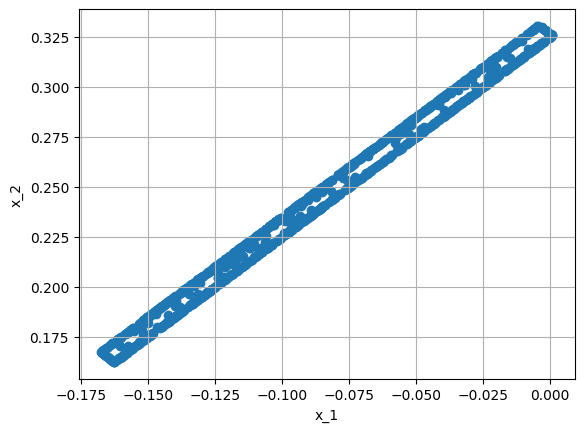

In [55]:
new_space = dp.spaces.R2('x') # the new object is 2D
p_x = P.slice_with_plane(new_space=new_space, plane_origin=[-0.325, 0, 0], plane_normal=[1, 1, 0])

p_sampler = dp.samplers.RandomUniformSampler(p_x, n_points=100) \
           + dp.samplers.RandomUniformSampler(p_x.boundary, n_points=1000)

dp.utils.scatter(new_space, p_sampler)

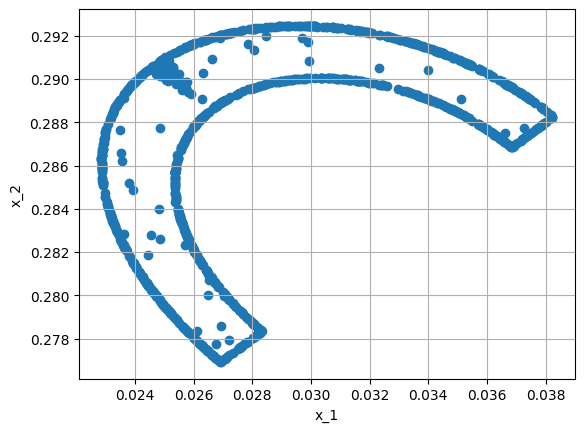

In [56]:
new_space = dp.spaces.R2('x') # the new object is 2D
p_x = P.slice_with_plane(new_space=new_space, plane_origin=[-0.25, 0, 0], plane_normal=[1, 1, 0])

p_sampler = dp.samplers.RandomUniformSampler(p_x, n_points=100) \
           + dp.samplers.RandomUniformSampler(p_x.boundary, n_points=1000)

dp.utils.scatter(new_space, p_sampler)

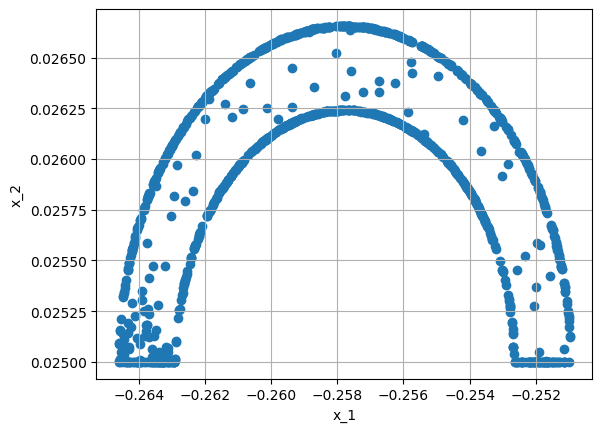

In [57]:
new_space = dp.spaces.R2('x') # the new object is 2D
p_x = P.slice_with_plane(new_space=new_space, plane_origin=[-0.25, 0.0, 0.05], plane_normal=[0, 1, 1])

p_sampler = dp.samplers.RandomUniformSampler(p_x, n_points=100) \
           + dp.samplers.RandomUniformSampler(p_x.boundary, n_points=1000)

dp.utils.scatter(new_space, p_sampler)